# ***Chi-Square test*** 

In [113]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

In [114]:
excluded_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = df1.drop(excluded_features , axis = 1)
features = pd.Series(cat_features.drop(['Churn'], axis=1).columns).append(pd.Series(['SeniorCitizen']))

In [115]:
# this function creates will automaticall generate the decision for the chi square test
def chi_square_test(data, feature):
    df = pd.crosstab(data[feature],data['Churn'])
    stat, p, dof, expected = chi2_contingency(df)
    print('='*60)
    print('Chi-Square Test for {}'.format(feature))
    print('='*60)
    print('degrees of freedom = %d' % dof)
    print('-'*60)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Results:')
    print(' ')
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    print('-'*60)
    print('Decision based on Chi-Square Statistics:')
    print(' ')
    if abs(stat) >= critical:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    # interpret p-value
    alpha = 1.0 - prob
    print('-'*60)
    print('Decision based on p-value:')
    print(' ')
    print('alpha = %.2f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    print('_'*60)
    print(' '*60)
    print('_'*60)
    print('_'*60)

In [116]:
for feature in features:
    chi_square_test(df1, feature)

Chi-Square Test for gender
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 0.475
------------------------------------------------------------
Decision based on Chi-Square Statistics:
 
The Churns are independent on gender : (fail to reject H0)
------------------------------------------------------------
Decision based on p-value:
 
alpha = 0.05, p = 0.490
The Churns are independent on gender : (fail to reject H0)
____________________________________________________________
                                                            
____________________________________________________________
____________________________________________________________
Chi-Square Test for SeniorCitizen
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 158.441
------------------------------------------------------------
De

# ***PCA (Priciple Component Analysis )Using Inbuilt Functions*** 

difference between transform , fit , fit_transform 


fit() :  we use the required formula and perform the calculation on the feature values of input data and fit this calculation to the transformer

transform() : For changing the data we probably do transform, in the transform() method, where we apply the calculations that we have calculated in fit() to every data point in feature F. 

fit_transform( ) : uppose, we create the StandarScaler object, and then we perform .fit_transform() then it will calculate the mean(μ) and standard deviation(σ) of the feature F at a time it will transform the data points of the feature F.

In [63]:
df1.columns  # total number of features == 20 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
num_var = df1.select_dtypes(include = ['int64','float64']).columns
num_var

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [65]:
df2_pca = df1.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn'] )

In [66]:
df2_pca.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
scaler.fit(df2_pca)

StandardScaler()

In [68]:
scaled_data = scaler.transform(df2_pca) #standardize and normalize numerical input variables for classification and regression
scaled_data

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [70]:
pca.explained_variance_ratio_   #used to get the ration of variance (eigenvalue / total eigenvalues)

array([0.72659927, 0.25358707])

In [71]:
x_pca = pca.transform(scaled_data)

In [72]:
scaled_data.shape

(7032, 3)

In [73]:
x_pca.shape

(7032, 2)

In [74]:
x_pca

array([[-1.95165689,  0.08275258],
       [-0.20579255,  0.23514165],
       [-1.51808264, -0.52254219],
       ...,
       [-1.63168822,  0.34516629],
       [-1.08184347, -1.00900265],
       [ 2.77397648, -0.12278947]])

In [75]:
target  = df1['Churn']

Text(0, 0.5, 'second component')

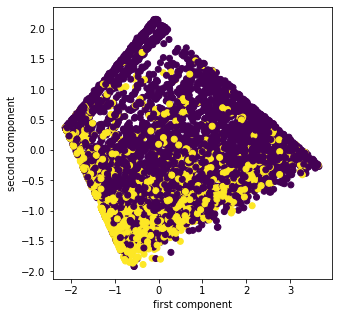

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c= target) # c = target has been used to plot components based on churn means target data -- here 0 has been shown by yellow and 1 has been shown by violet 
plt.xlabel("first component")
plt.ylabel("second component")

# ***PCA - Step by step***



In [77]:
from numpy.linalg import eig  # import rigen values from linear algebra 

In [78]:
df2_pca.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [79]:
# plt.scatter(df2_pca['MonthlyCharges'],df2_pca['TotalCharges'],df2_pca['tenure'] )

In [80]:
# transfering data frame to array and cheking type 
array_df = df2_pca.to_numpy()
type(array_df)        

numpy.ndarray

In [81]:
# making data mean centric 
mean_by_column = np.mean(array_df.T, axis = 1)
scaled_arr_df = array_df - mean_by_column  # here scaling has been done because rotation will happen  
scaled_arr_df

array([[-3.14217861e+01, -3.49482082e+01, -2.25345044e+03],
       [ 1.57821388e+00, -7.84820819e+00, -3.93800441e+02],
       [-3.04217861e+01, -1.09482082e+01, -2.17515044e+03],
       ...,
       [-2.14217861e+01, -3.51982082e+01, -1.93685044e+03],
       [-2.84217861e+01,  9.60179181e+00, -1.97670044e+03],
       [ 3.35782139e+01,  4.08517918e+01,  4.56119956e+03]])

In [82]:
#find covariance matrix of above scaled data 
cov_mat_arr_df = np.cov(scaled_arr_df.T) # transpose is beacuse we want to do it feature by feature 
cov_mat_arr_df

array([[6.02469774e+02, 1.82299526e+02, 4.59507432e+04],
       [1.82299526e+02, 9.05165825e+02, 4.44013331e+04],
       [4.59507432e+04, 4.44013331e+04, 5.13825241e+06]])

In [83]:
# find corresponding eigen value and eigen vector of above covariance matrix 
Eval , Evec = eig(cov_mat_arr_df)

In [84]:
print(Eval)  # l1 ,l2 l3 
print(Evec)

[5.13904705e+06 8.56756329e+01 6.27320645e+02]
[[-0.00894215 -0.89691499  0.44211259]
 [-0.00864116 -0.44204445 -0.89695152]
 [-0.99992268  0.01184105  0.00379756]]


In [85]:
# get original data projected to pricipal componenets as new axis 
projected_data = Evec.T.dot(scaled_arr_df.T) # projecting original data to new axis 
print(projected_data.T)

[[ 2.25385918e+03  1.69481200e+01  8.89726734e+00]
 [ 3.93823698e+02 -2.60927631e+00  6.24172959e+00]
 [ 2.17534890e+03  6.36929227e+00 -1.18901077e+01]
 ...
 [ 1.93719640e+03  1.18383567e+01  1.47449387e+01]
 [ 1.97671879e+03 -2.15869535e+00 -2.86846105e+01]
 [-4.56150016e+03  5.83426670e+00 -4.47529527e+00]]


In [86]:
pca_new = PCA(n_components=2)
pca_df_new = pca_new.fit_transform(array_df)
pca_df_new.T

array([[-2.25385918e+03, -3.93823698e+02, -2.17534890e+03, ...,
        -1.93719640e+03, -1.97671879e+03,  4.56150016e+03],
       [-8.89726734e+00, -6.24172959e+00,  1.18901077e+01, ...,
        -1.47449387e+01,  2.86846105e+01,  4.47529527e+00]])

In [87]:
pca_new.explained_variance_ratio_  #used to get the ration of variance (eigenvalue / total eigenvalues)

array([9.99861278e-01, 1.22052516e-04])

In [88]:
pca_df_new_df3 = pd.DataFrame(data = pca_df_new, columns = ['PC1','PC2'])
pca_df_new_df3.sample(5)

,PC1,PC2
2510,5051.076084,11.976617
1614,3270.168141,-13.608822
4030,-749.294857,-44.198675
6256,-2209.370591,4.305252
2689,-2113.995540,-21.672240


In [89]:
# how much weight each variable has in principal components 
loadings = pd.DataFrame(pca_new.components_.T, columns= ['PC1','PC2'], index = ['tenure','MonthlyCharges','TotalCharges'])
loadings # pc1 = a1* tenure+ a2*monthlycharges + a3 * totalcharges 

,PC1,PC2
tenure,0.008942,-0.442113
MonthlyCharges,0.008641,0.896952
TotalCharges,0.999923,-0.003798


In [90]:
# inverse transform 
# pca_new.inverse_transform(pca_df_new)

# ***Attribute Or Feature Selection***
1.   Univarate Selection 
2.   Corraltion 
3.   Information Gain 



In [91]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [92]:
# need to do encoding 
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [93]:
df2 = df1 
df2.shape

(7032, 20)

In [94]:
# Encoding 
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_col:
  df2[col].replace({'Yes':1 , 'No':0},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [95]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [96]:
df2['gender'].replace({'Female':1 , 'Male':0}, inplace = True)

In [97]:
df2['gender'].unique()

array([1, 0])

In [98]:
# Hot encoding 
df3 = pd.get_dummies(data = df2, columns= ['InternetService','Contract','PaymentMethod']) # strnig in a new data frame
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [99]:
df3.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1


In [100]:
df3.shape

(7032, 27)

In [101]:
df3.dtypes # all data types are in numbers , not string 

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [102]:
# we need to scaling our data as most of the column lie in [0,1] except 3 columns 
# using min max scaler 
# col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df3[col_to_scale] = scaler.fit_transform(df3[col_to_scale])

In [103]:
df3.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0


1. Univarate Selection ->

Univariate feature selection. Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. It is also called analysis of variance (ANOVA).

In [104]:
df4 = df3.copy()
X = df3.drop('Churn', axis = 1) # remianing all the feature with subtracting the last feature which is churn 
Y = df3['Churn']

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [106]:
# apply select k best Algorithms total are 26 
ordered_rank_features = SelectKBest(score_func=chi2,k=26)
ordered_feature = ordered_rank_features.fit(X,Y)
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)
feature_k_best = pd.concat([dfcolumns,dfscores],axis =1)
feature_k_best.columns  = ['Features','Score']
feature_k_best

,Features,Score
0,gender,0.259116
1,SeniorCitizen,133.482766
2,Partner,81.857769
3,Dependents,131.271509
4,tenure,16377.328093
5,PhoneService,0.092948
6,MultipleLines,6.514651
7,OnlineSecurity,147.165601
8,OnlineBackup,31.209832
9,DeviceProtection,20.216007


In [107]:
feature_k_best.nlargest(15,'Score')

,Features,Score
15,TotalCharges,629630.810349
4,tenure,16377.328093
14,MonthlyCharges,3653.074681
19,Contract_Month-to-month,516.714004
21,Contract_Two year,486.223101
24,PaymentMethod_Electronic check,424.113152
17,InternetService_Fiber optic,372.082851
18,InternetService_No,285.475152
20,Contract_One year,176.608724
7,OnlineSecurity,147.165601


Feature importance 

The scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit(X,Y)

ExtraTreesClassifier()

In [109]:
print(model.feature_importances_) 

[0.03770244 0.02619191 0.03146914 0.02508023 0.13541929 0.00773683
 0.02499445 0.02610504 0.02712778 0.02530576 0.02479329 0.02245913
 0.02254085 0.03013006 0.12934331 0.15300649 0.01095354 0.04353799
 0.0135702  0.07182244 0.01410793 0.02671996 0.01262655 0.01325704
 0.03288365 0.01111469]


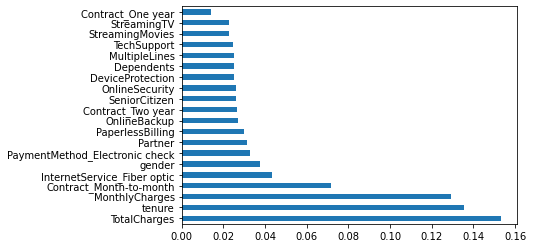

In [110]:
plot_ranked_feature= pd.Series(model.feature_importances_,index= X.columns)
plot_ranked_feature.nlargest(20).plot(kind = 'barh')
plt.show()

Correlation 

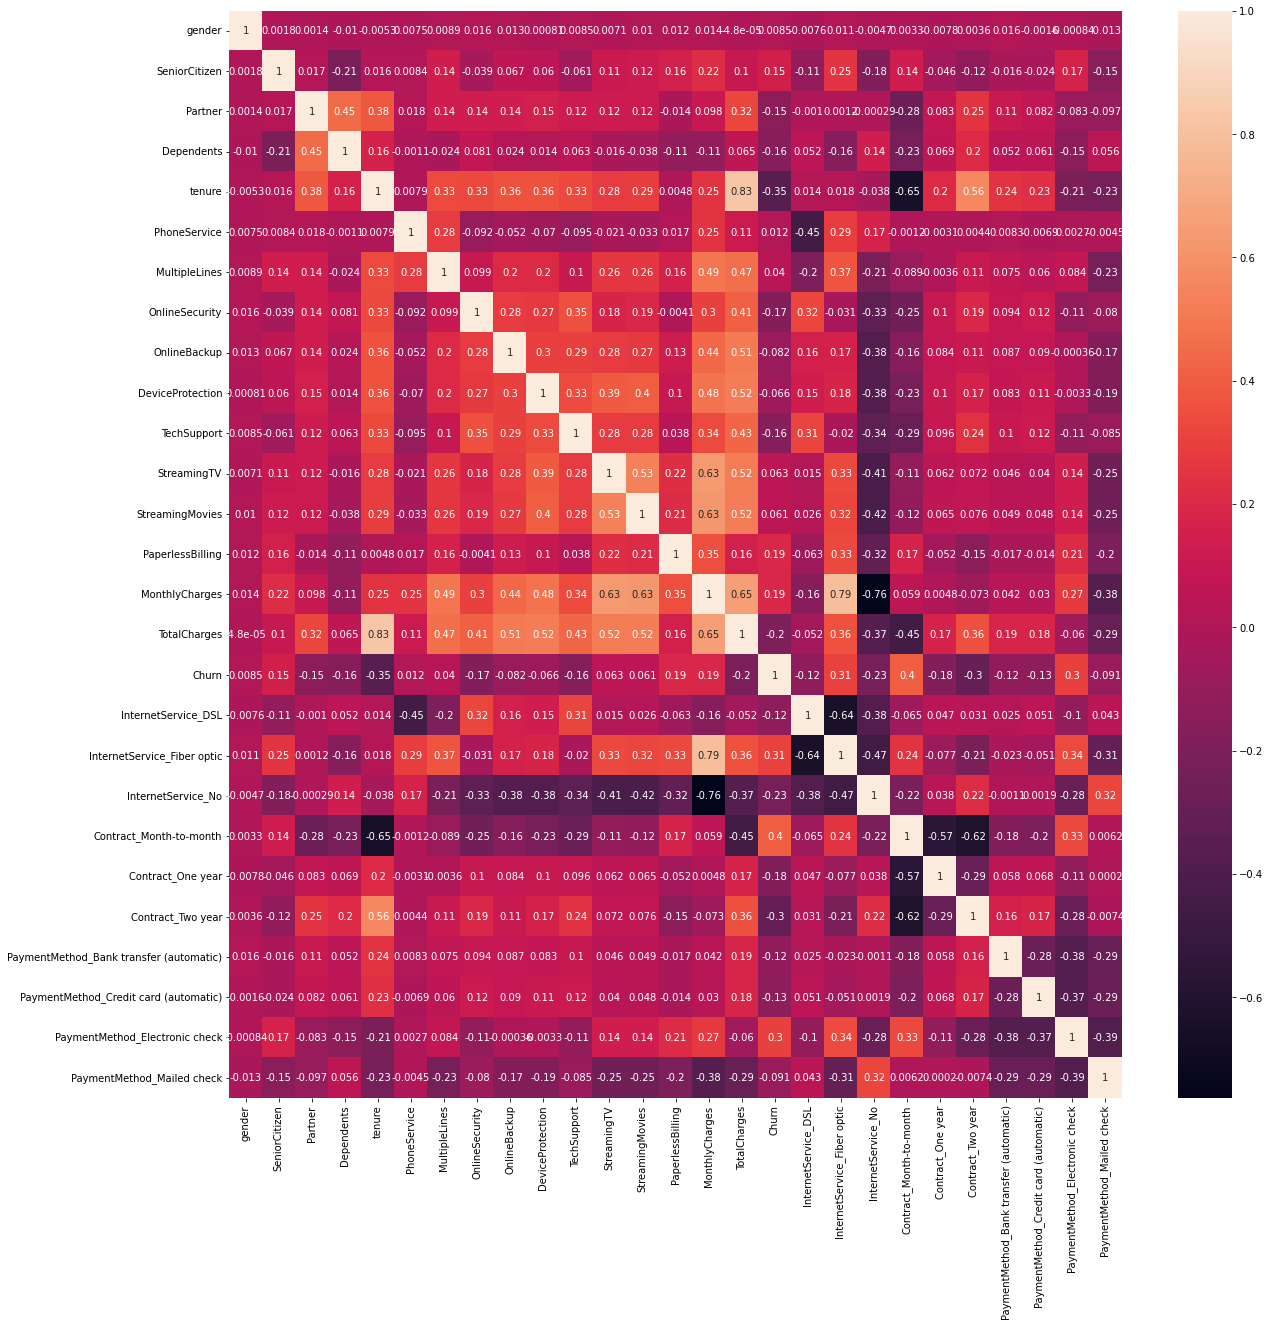

In [111]:
corr = df3.corr()
top_features = corr.index
plt.figure(figsize = (20,20))
sns.heatmap(df3[top_features].corr(),annot=True)

Information Gain :
Mututal Dpendency 



In [112]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,Y) #Mutual information (MI): between two random variables is a non-negative value, which measures the 
           #dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
mutual_data = pd.Series(mutual_info,index =X.columns)
mutual_data.sort_values(ascending=False)

Contract_Month-to-month                    0.100082
tenure                                     0.072307
Contract_Two year                          0.061449
InternetService_Fiber optic                0.050223
PaymentMethod_Electronic check             0.047539
TotalCharges                               0.043866
MonthlyCharges                             0.041493
InternetService_No                         0.031557
Dependents                                 0.019678
PaperlessBilling                           0.019329
TechSupport                                0.018368
InternetService_DSL                        0.018170
Contract_One year                          0.016867
PaymentMethod_Credit card (automatic)      0.013679
OnlineSecurity                             0.013516
OnlineBackup                               0.013132
SeniorCitizen                              0.010175
PhoneService                               0.004900
Partner                                    0.004863
PaymentMetho